# **Import de paquetes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Dataset load**

In [2]:
df = pd.read_table("/home/asado/Escritorio/Tesis/Dashboard/corpo")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   specie        257 non-null    object 
 1   season        257 non-null    object 
 2   period        151 non-null    object 
 3   cort          181 non-null    float64
 4   time          135 non-null    float64
 5   site          257 non-null    object 
 6   age           251 non-null    object 
 7   sex           125 non-null    object 
 8   tright        250 non-null    float64
 9   tleft         250 non-null    float64
 10  wing          16 non-null     float64
 11  weight        249 non-null    float64
 12  fat           249 non-null    float64
 13  muscle        250 non-null    float64
 14  molt          257 non-null    object 
 15  mlocation     37 non-null     object 
 16  parasite      97 non-null     object 
 17  fecal         162 non-null    object 
 18  feathers      252 non-null    

# **Drop nulls from target**

In [3]:
df = df[df['sex'].notna()]

In [264]:
df.isna().sum()

specie            0
season            0
period           65
cort             27
time             64
site              0
age               4
sex               0
tright            2
tleft             2
wing            125
weight            4
fat               3
muscle            2
molt              0
mlocation       109
parasite         75
fecal            48
feathers          2
operator         47
heterophils      10
eosinophils      10
basophils        10
monocites        10
linfocites       10
trombo           10
rate             10
leucount         10
glucose          37
triglicerids     37
proteins         38
dtype: int64

# **Value counts**

In [4]:
df["sex"].value_counts(normalize = True)

M    0.544
H    0.456
Name: sex, dtype: float64

In [548]:
df["age"].value_counts()

A    113
J      8
Name: age, dtype: int64

In [4]:
df["operator"].value_counts()

AD    61
BD    13
EC     2
AQ     2
Name: operator, dtype: int64

## **Preprocessing**

In [5]:
df = df.drop(["season","cort","tleft","leucount", "glucose", "triglicerids", "proteins", "rate", "proteins", "glucose", "triglicerids", "wing", "mlocation", "parasite", "fecal", "time", "period", "site", "feathers", "molt","trombo", "basophils", "monocites", "eosinophils", "linfocites","heterophils"], axis = 1)

# **Drop duplicates**

In [6]:
df = df.drop_duplicates()

# **Pairplot**

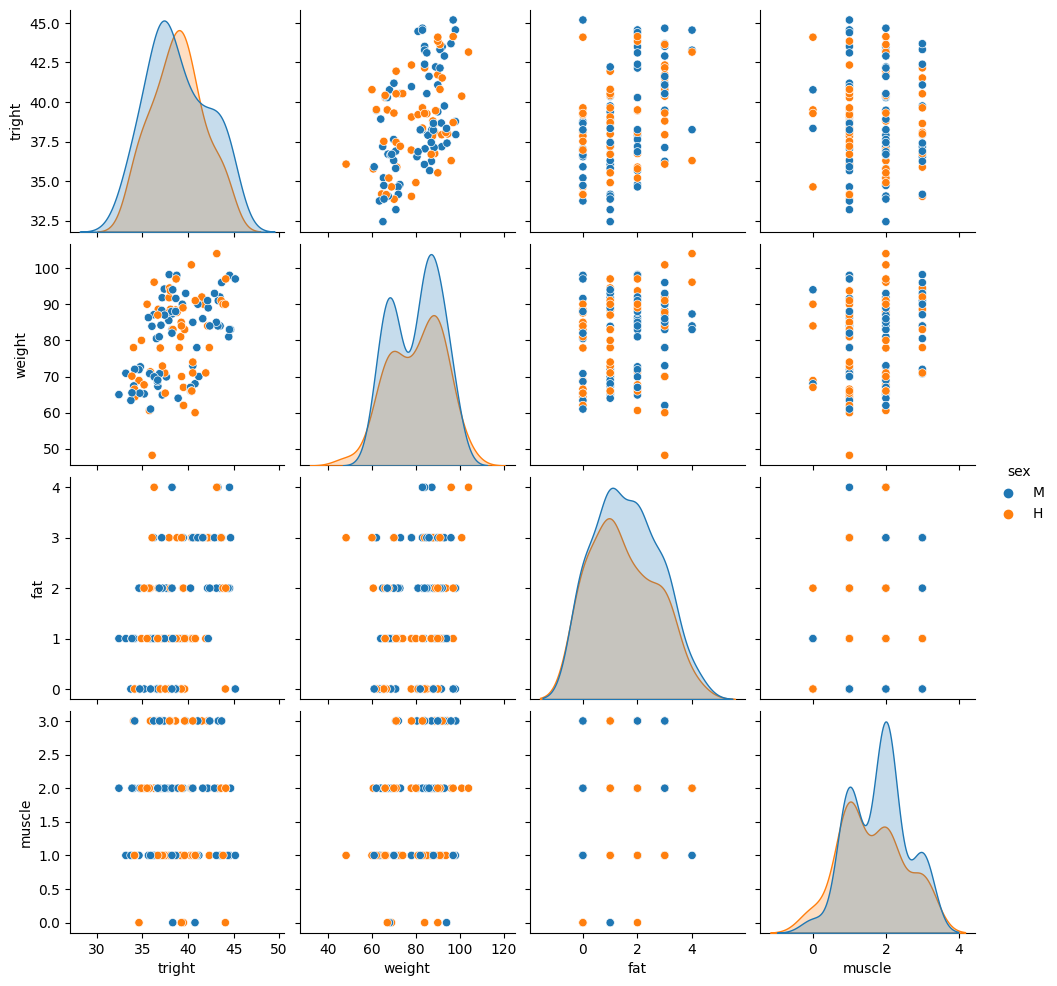

In [302]:
sns.pairplot(df, hue = 'sex')

<AxesSubplot:>

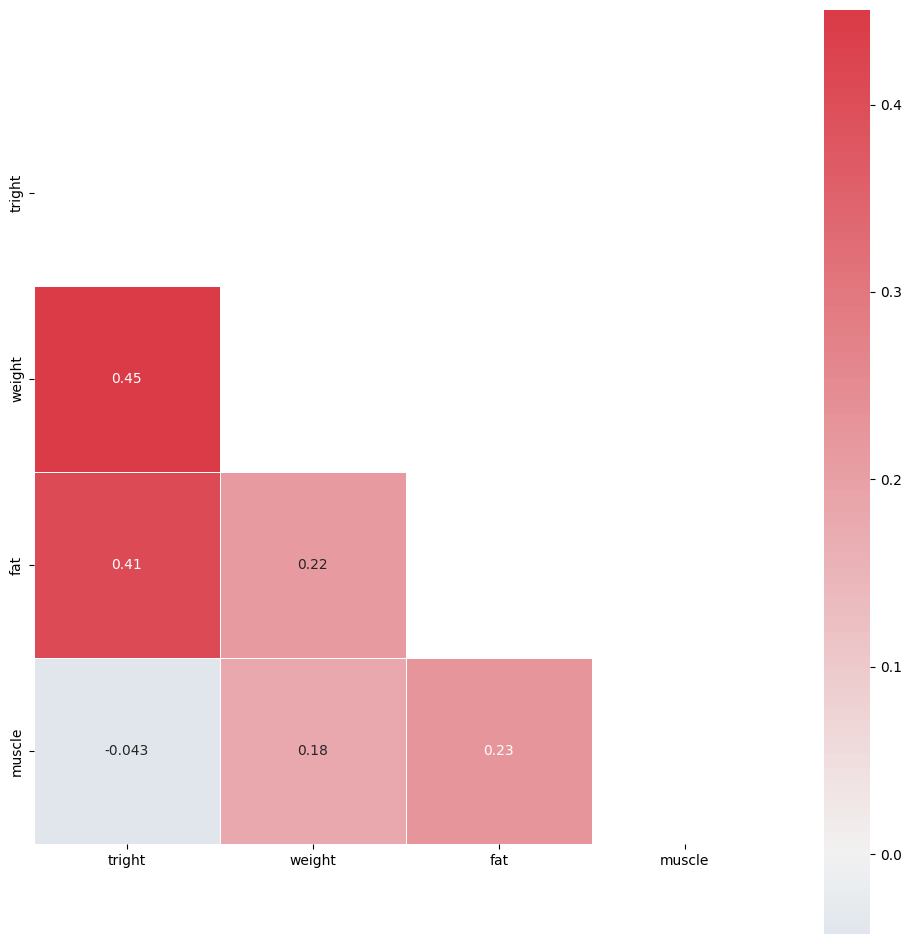

In [553]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

## Sex encoding

In [7]:
map_sex = {'M':0, 'H':1} 
df['sex'] = df['sex'].replace(map_sex) 
df

,specie,age,sex,tright,weight,fat,muscle,operator
2,TC,A,0,37.17,91.81,1.0,3.0,AD
7,TC,A,1,35.88,71.30,2.0,3.0,AD
11,TC,A,0,37.94,98.20,2.0,3.0,AD
12,TC,A,1,38.64,88.40,1.0,3.0,AD
14,TC,A,0,37.40,94.20,1.0,3.0,AD
...,...,...,...,...,...,...,...,...
240,TC,A,1,39.28,84.00,0.0,0.0,BD
241,TC,A,1,40.80,91.00,1.0,1.0,BD
251,TC,A,1,35.52,90.00,1.0,2.0,BD
252,TC,A,0,38.65,88.00,0.0,1.0,BD


In [555]:
df.isna().sum()/df.shape[0]

specie      0.000
age         0.032
sex         0.000
tright      0.016
weight      0.032
fat         0.024
muscle      0.016
operator    0.376
dtype: float64

# **Correlation with target**

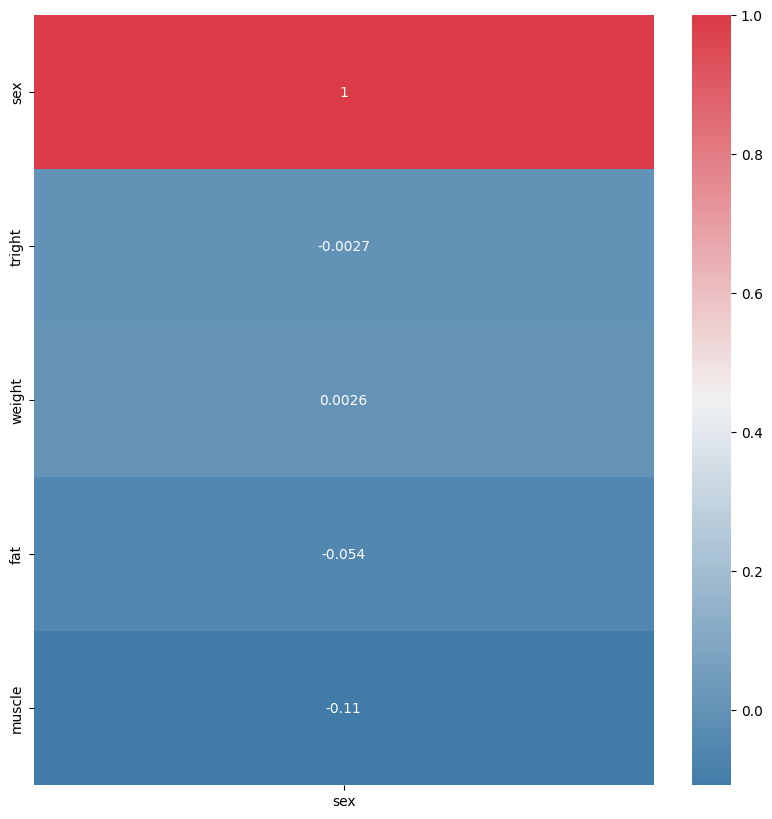

In [556]:
target_corr = pd.DataFrame(df.corr()['sex'], index=df.corr().index)

plt.figure(figsize=(10,10))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()

## age encoding

In [8]:
reemplazo = df["age"].mode()
df["age"] = df["age"].fillna(reemplazo)
from sklearn.preprocessing import LabelEncoder
encoder_age = LabelEncoder() 
df["age_encoded"] = encoder_age.fit_transform(df[["age"]])
df = df.drop("age", axis = 1)

/home/asado/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## operator encoding

In [9]:
reemplazo = df["operator"].mode()
df["operator"] = df["operator"].fillna(reemplazo)
from sklearn.preprocessing import LabelEncoder
encoder_operator = LabelEncoder() 
df["operator_encoded"] = encoder_operator.fit_transform(df[["operator"]])
df = df.drop("operator", axis = 1)

/home/asado/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#encoder_season = LabelEncoder() 
#df["season_encoded"] = encoder_season.fit_transform(df[["season"]])
#df = df.drop("season", axis = 1)

## specie encoding

In [10]:
map_specie = {'TC':0, 'TR':1} 
df['specie'] = df['specie'].replace(map_specie) 
df

,specie,sex,tright,weight,fat,muscle,age_encoded,operator_encoded
2,0,0,37.17,91.81,1.0,3.0,0,0
7,0,1,35.88,71.30,2.0,3.0,0,0
11,0,0,37.94,98.20,2.0,3.0,0,0
12,0,1,38.64,88.40,1.0,3.0,0,0
14,0,0,37.40,94.20,1.0,3.0,0,0
...,...,...,...,...,...,...,...,...
240,0,1,39.28,84.00,0.0,0.0,0,2
241,0,1,40.80,91.00,1.0,1.0,0,2
251,0,1,35.52,90.00,1.0,2.0,0,2
252,0,0,38.65,88.00,0.0,1.0,0,2


In [ ]:
#fig = plt.figure()
#ax = plt.axes()
#ax = sns.boxplot(x= df.cort)
#ax.set_title("Distribución de la variable cort")
#plt.show()

In [22]:
#df = df[df.cort <25]

In [ ]:
#fig = plt.figure()
#ax = plt.axes()
#ax = sns.boxplot(x= df.cort)
#ax.set_title("Distribución de la variable cort (Sacando valores extremos)")
#plt.show()

## **Boxplots**

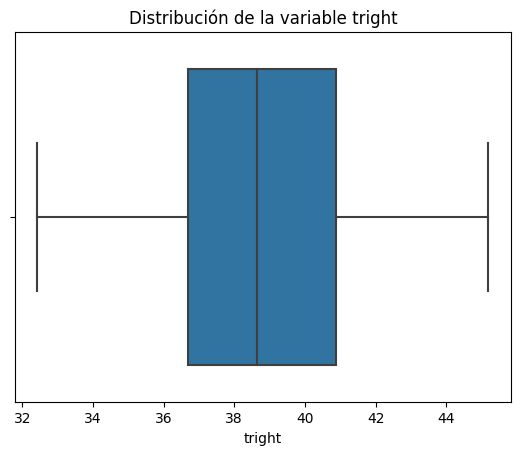

In [309]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x= df.tright)
ax.set_title("Distribución de la variable tright")
plt.show()

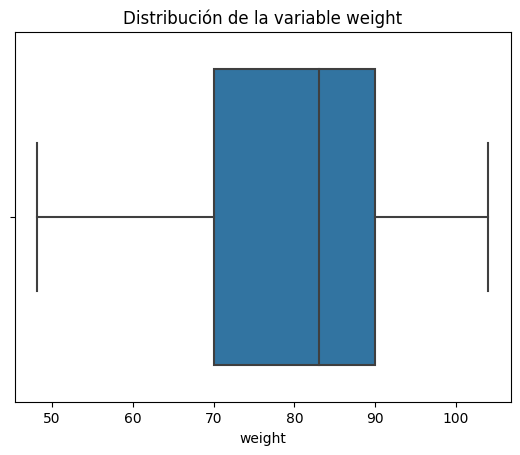

In [310]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x= df.weight, hue = df.sex)
ax.set_title("Distribución de la variable weight")
plt.show()

## **median impute**

In [11]:
#median_cort = df["cort"].median()
#df["cort"] = df["cort"].fillna(median_cort)

median_tright = df["tright"].median()
df["tright"] = df["tright"].fillna(median_tright)

median_weight = df["weight"].median()
df["weight"] = df["weight"].fillna(median_weight)

median_fat = df["fat"].median()
df["fat"] = df["fat"].fillna(median_fat)

median_muscle = df["muscle"].median()
df["muscle"] = df["muscle"].fillna(median_muscle)

In [12]:
df.isna().sum()/df.shape[0]

specie              0.0
sex                 0.0
tright              0.0
weight              0.0
fat                 0.0
muscle              0.0
age_encoded         0.0
operator_encoded    0.0
dtype: float64

# **Separación entre target y features**

In [13]:
y = df["sex"]
x = df.drop("sex", axis = 1)


In [37]:
x.shape, y.shape

((125, 7), (125,))

# **Train test split**

In [14]:
#Realizo el train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=42) 

In [38]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((106, 7), (19, 7), (106,), (19,))

# **Arbol de decisión**

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=8, criterion = "gini")
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [40]:
#Realizo las predicciones con ambos conjuntos
train_predict = tree.predict(x_train)
test_predict = tree.predict(x_test)

In [41]:
#Evalúo su accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train, train_predict),   accuracy_score(y_test, test_predict)

(0.8773584905660378, 0.7368421052631579)

In [19]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

train_predict = tree.predict(x_train)
test_predict = tree.predict(x_test)

print(classification_report(y_train, train_predict))
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.84      0.90      0.87        48

    accuracy                           0.88       106
   macro avg       0.88      0.88      0.88       106
weighted avg       0.88      0.88      0.88       106

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.75      0.67      0.71         9

    accuracy                           0.74        19
   macro avg       0.74      0.73      0.73        19
weighted avg       0.74      0.74      0.74        19



In [20]:
#Grafico la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, test_predict)


array([[8, 2],
       [3, 6]])

/home/asado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


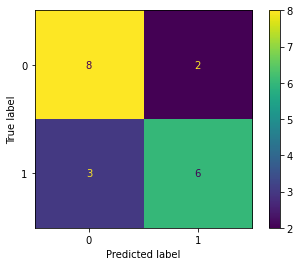

In [99]:
plot_confusion_matrix(tree, x_test, y_test)

In [21]:
from sklearn.metrics import f1_score
max_depths = np.arange(1, 15)
train_fscores = []
test_fscores = []

for i in max_depths:
  tree = DecisionTreeClassifier(max_depth=i)  #Instancia el elemento con el valor de max_depth de esa iteración

  tree.fit(x_train, y_train)
  train_preds = tree.predict(x_train)
  test_preds = tree.predict(x_test)

  train_fscores.append(f1_score(y_train, train_preds))
  test_fscores.append(f1_score(y_test, test_preds))

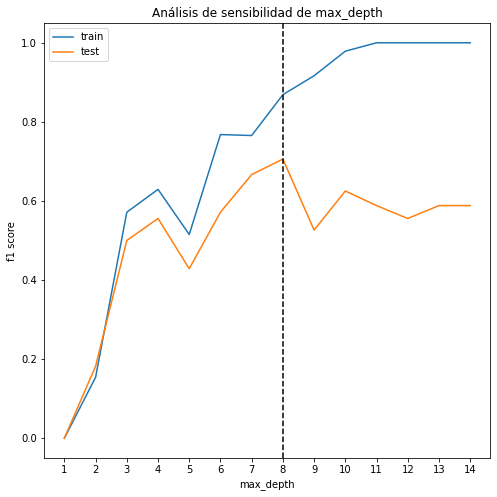

In [22]:
plt.figure(figsize=(8,8))
plt.plot(max_depths, train_fscores, label="train")
plt.plot(max_depths, test_fscores,  label="test")
plt.title ("Análisis de sensibilidad de max_depth")
plt.axvline(8, color='black', linestyle='--')
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.xticks(max_depths)
plt.legend()

In [23]:
tree.feature_importances_
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = x_train.columns
fi["IMPORTANCE"] = tree.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

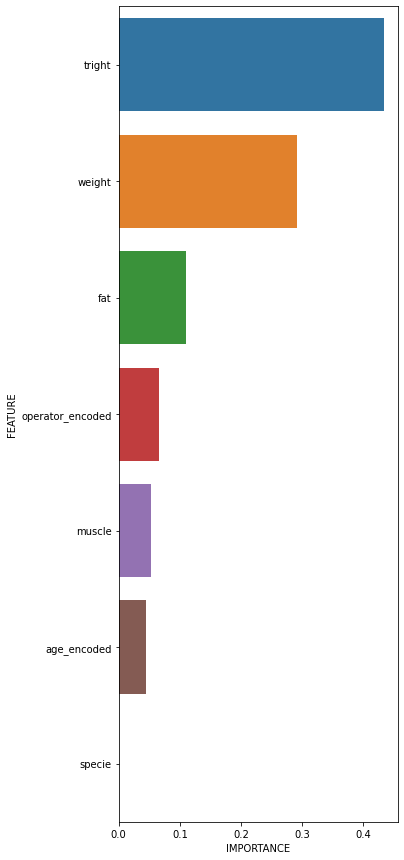

In [24]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

# **Cross validation para el arbol de decisión**

In [21]:
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier(max_depth= 8)
tree_scores = cross_val_score(tree, x, y, cv=50)
tree_scores

array([0.33333333, 0.66666667, 0.33333333, 0.66666667, 0.66666667,
       0.33333333, 0.66666667, 1.        , 0.66666667, 0.66666667,
       0.66666667, 0.33333333, 0.66666667, 1.        , 0.        ,
       0.66666667, 0.        , 0.66666667, 0.66666667, 0.33333333,
       0.66666667, 0.66666667, 0.33333333, 0.66666667, 0.33333333,
       0.5       , 0.        , 1.        , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 1.        ,
       0.        , 0.5       , 1.        , 1.        , 0.5       ,
       1.        , 0.        , 0.5       , 0.        , 0.5       ,
       0.5       , 1.        , 1.        , 0.        , 0.5       ])

In [22]:
tree_scores.mean()

0.5433333333333333

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ["gini"],
    "min_samples_split": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(x_train, y_train)

/home/asado/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/asado/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/asado/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/home/asado/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scalar(
  File "/home/asado/.local/lib/python3.8/site-packages/sklearn/utils

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [28]:
clf.best_estimator_, clf.best_score_

(DecisionTreeClassifier(max_depth=3), 0.528138528138528)

# **Random forest**

In [573]:
%%time
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=7, n_estimators = 200, n_jobs = -1, random_state=0)
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        48

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.67      0.44      0.53         9

    accuracy                           0.63        19
   macro avg       0.64      0.62      0.61        19
weighted avg       0.64      0.63      0.62        19

CPU times: user 681 ms, sys: 47.7 ms, total: 729 ms
Wall time: 991 ms


In [494]:
clf.feature_importances_
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = x_train.columns
fi["IMPORTANCE"] = clf.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

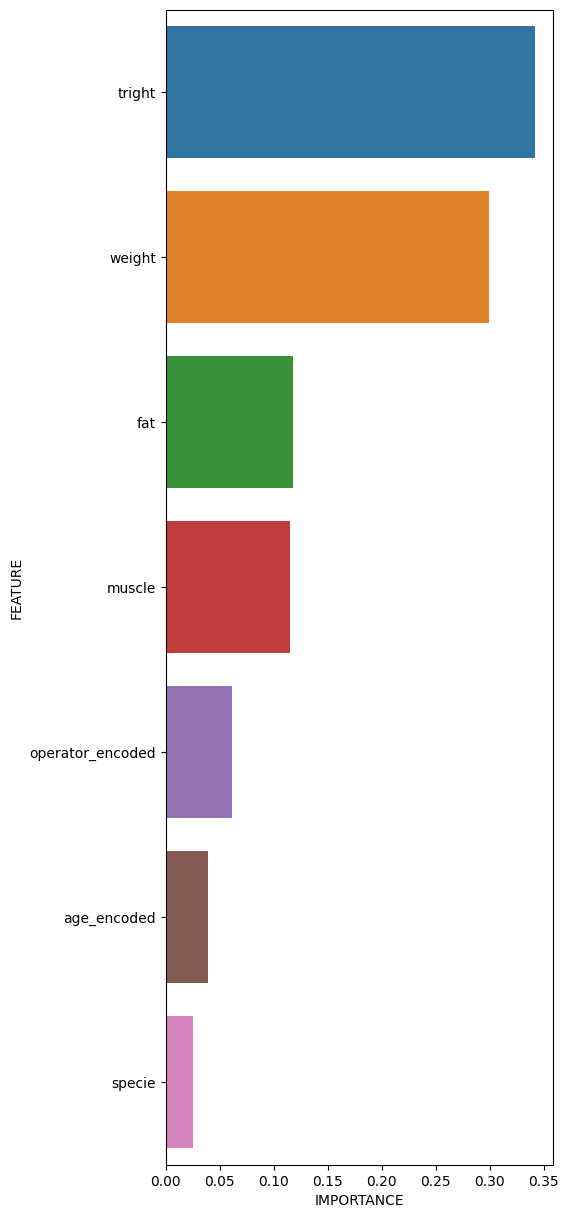

In [495]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

# **Logistic regression**

In [578]:
from sklearn.linear_model import LogisticRegression
logc = LogisticRegression()
logc.fit(x_train, y_train)

/home/asado/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [579]:
train_pred = logc.predict(x_train)
test_pred = logc.predict(x_test)
print(classification_report(y_train, train_pred))
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.58      0.81      0.68        58
           1       0.56      0.29      0.38        48

    accuracy                           0.58       106
   macro avg       0.57      0.55      0.53       106
weighted avg       0.57      0.58      0.54       106

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.33      0.11      0.17         9

    accuracy                           0.47        19
   macro avg       0.42      0.46      0.39        19
weighted avg       0.42      0.47      0.40        19



# **Discriminant analysis**

In [582]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit_transform(x_train, y_train)
train_pred = lda.predict(x_train)
test_pred =lda.predict(x_test)

In [583]:
print(classification_report(y_train, train_pred))
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.66        58
           1       0.54      0.31      0.39        48

    accuracy                           0.57       106
   macro avg       0.56      0.54      0.53       106
weighted avg       0.56      0.57      0.54       106

              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.50      0.22      0.31         9

    accuracy                           0.53        19
   macro avg       0.52      0.51      0.47        19
weighted avg       0.52      0.53      0.48        19



In [603]:
lda_scores = cross_val_score(lda, x, y, cv=10)
lda_scores

array([0.53846154, 0.46153846, 0.53846154, 0.38461538, 0.30769231,
       0.5       , 0.25      , 0.41666667, 0.16666667, 0.58333333])

In [604]:
lda_scores.mean()

0.41474358974358977

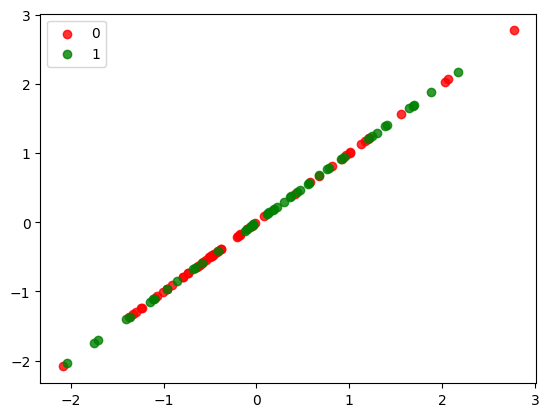

In [620]:
#CREATE LDA PLOT
X = x_train
y = y_train
model = LinearDiscriminantAnalysis()
X_r2 = model.fit(X, y).transform(X)
target_names = df["sex"]

plt.figure()
colors = ['red', 'green']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 0], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

# Escalamiento y train test split para SVM y K nearest neighbors

In [630]:
numeric_features = df[["tright", "weight", "fat", "muscle"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["tright", "weight", "fat", "muscle"]] = scaler.fit_transform(df[["tright", "weight", "fat", "muscle"]])
df

,specie,sex,tright,weight,fat,muscle,age_encoded,operator_encoded
2,0,0,-0.555246,1.015966,-0.465019,1.588133,0,0
7,0,1,-0.976223,-0.799296,0.415699,1.588133,0,0
11,0,0,-0.303965,1.581520,0.415699,1.588133,0,0
12,0,1,-0.075528,0.714160,-0.465019,1.588133,0,0
14,0,0,-0.480188,1.227496,-0.465019,1.588133,0,0
...,...,...,...,...,...,...,...,...
240,0,1,0.133329,0.324733,-1.345738,-2.134054,0,2
241,0,1,0.629364,0.944276,-0.465019,-0.893325,0,2
251,0,1,-1.093705,0.855770,-0.465019,0.347404,0,2
252,0,0,-0.072264,0.678757,-1.345738,-0.893325,0,2


In [637]:
X = df.drop("sex", axis = 1)
Y = df["sex"] 

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.15, stratify=y, random_state=42) 

ValueError: Found input variables with inconsistent numbers of samples: [125, 106]

# SVM

In [498]:
from sklearn.svm import SVC

classifier = SVC(C = 0.01, kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)
Test_Pred = classifier.predict(X_Test)
Train_Pred = classifier.predict(X_Train)
print(classification_report(Y_Train, Train_Pred))
print(classification_report(Y_Test, Test_Pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        58
           1       0.00      0.00      0.00        48

    accuracy                           0.55       106
   macro avg       0.27      0.50      0.35       106
weighted avg       0.30      0.55      0.39       106

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         9

    accuracy                           0.53        19
   macro avg       0.26      0.50      0.34        19
weighted avg       0.28      0.53      0.36        19



/home/asado/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/asado/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/asado/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/asado/.local/lib/python3.8/site-packa

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_boundaries(X, Y):
  X_Set, Y_Set = X, Y
  X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

  plt.figure(figsize=(10,5))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(Y_Set)):
      plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Support Vector Machine', fontsize=20)
  plt.xlabel('Edad', fontsize=15)
  plt.ylabel('Salario Estimado', fontsize=15)
  plt.legend()
  plt.show()

plot_decision_boundaries(X_Test, Y_Test)

In [501]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1],
    'kernel': ["linear", "poly", "rbf", "sigmoid"]
}

clf = RandomizedSearchCV(SVC(), parameters)
clf.fit(X_Train, Y_Train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [502]:
clf.best_estimator_, clf.best_score_

(SVC(C=0.1, kernel='sigmoid'), 0.5471861471861471)

# k nearest neighbors

In [503]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(X_Train, Y_Train)
pred_train = knn.predict(X_Train)
pred_test = knn.predict(X_Test)
print(classification_report(Y_Train, pred_train))
print(classification_report(Y_Test, pred_test))

              precision    recall  f1-score   support

           0       0.61      0.97      0.75        58
           1       0.86      0.25      0.39        48

    accuracy                           0.64       106
   macro avg       0.73      0.61      0.57       106
weighted avg       0.72      0.64      0.58       106

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.22      0.36         9

    accuracy                           0.63        19
   macro avg       0.79      0.61      0.55        19
weighted avg       0.78      0.63      0.56        19



In [251]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
    'weights': ["uniform", "distance"]
}

clf = GridSearchCV(KNeighborsClassifier(), parameters)
clf.fit(X_Train, Y_Train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [252]:
clf.best_estimator_, clf.best_score_

(KNeighborsClassifier(n_neighbors=4, weights='distance'), 0.5471861471861471)

# Xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200)
xgb.fit(x_train, y_train)

In [ ]:
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Stacking

In [194]:
from sklearn.ensemble import StackingClassifier

estimators = [
              ("tree", DecisionTreeClassifier(max_depth = 7)),
              ('rf', RandomForestClassifier(max_depth=5, n_estimators = 200, n_jobs = -1, random_state=0)), 
              ('svc', SVC(C = 0.01, kernel = 'linear', random_state = 0)),
              ("knn", KNeighborsClassifier(n_neighbors = 6, weights='uniform')),
              ("xgb", XGBClassifier(n_estimators=200))]

clf = StackingClassifier(
    estimators=estimators, final_estimator=DecisionTreeClassifier(max_depth=5)
)


In [ ]:
%%time
clf.fit(x_train, y_train)

In [ ]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Gráfico del arbol de decisión

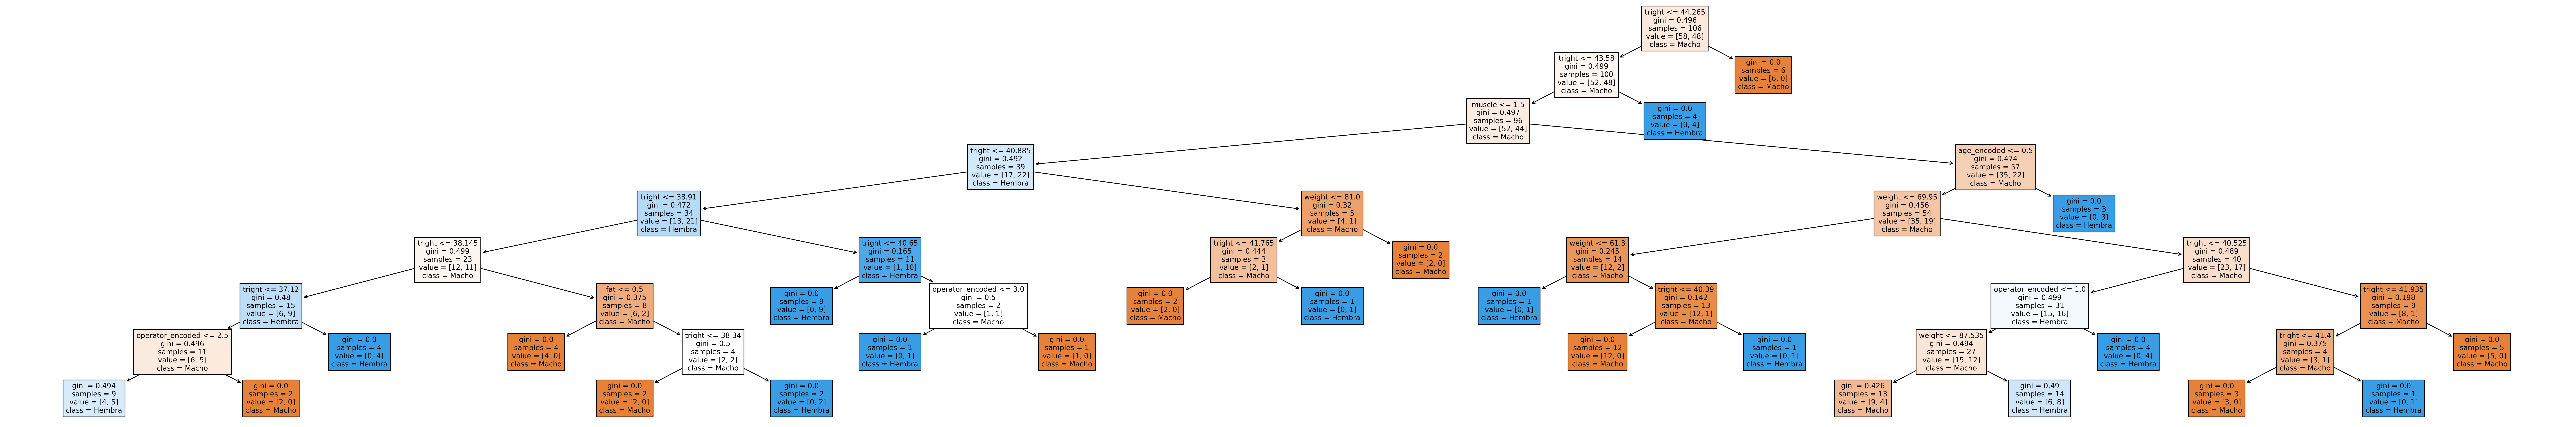

In [55]:
from sklearn.tree import plot_tree

fn= x.columns #crea una lista con los nombres de columnas (features)
cn=['Macho', 'Hembra'] #crea una lista con las distintos valores de target
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (60,10), dpi=300)
plot_tree(tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('')  

# Predicciones usando datos no vistos por el modelo

In [257]:
x

Index(['specie', 'tright', 'weight', 'fat', 'muscle', 'age_encoded',
       'operator_encoded'],
      dtype='object')

In [42]:
Xnew = [[1, 35.77, 60.6, 2, 2, 0, 0]]
# make a prediction
ynew = tree.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[1, 35.77, 60.6, 2, 2, 0, 0], Predicted=1


/home/asado/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [44]:
Xnew = pd.read_table("/home/asado/Escritorio/turdus2")
# make a prediction
ynew = tree.predict(Xnew)
ynew

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

# Curva ROC y AUC

In [50]:
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [51]:
y_test = label_binarize(y_test, classes=[1, 0])
n_classes = y_test.shape[1]
print(y_test[:5])


[[0]
 [1]
 [1]
 [0]
 [1]]


In [52]:
n_classes = y_test.shape[1]
y_score = tree.predict_proba(x_test)
print(y_score[:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [53]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

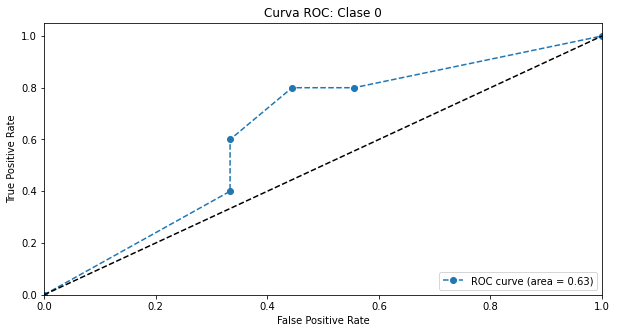

In [54]:
for i in range(n_classes):
    plt.figure(figsize=(10,5))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.show()

# **Auto ML**

In [35]:
from autosklearn.classification import AutoSklearnClassifier
# Definimos el modelo de autoML, especificamos el tiempo total de ejecuciòn y el tiempo por modelo
AutoMLmodel = AutoSklearnClassifier(time_left_for_this_task=3*60,
                              per_run_time_limit=30
                              )

# Entrenamos el modelo con los datos Xtrain y ytrain
AutoMLmodel.fit(x_train, y_train)

# Presentamos las estadísticas de la ejecución
print(AutoMLmodel.sprint_statistics())

AutoMLmodel.score(x_test,y_test)

/home/asado/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/home/asado/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


[WARNING] [2022-06-18 22:26:19,033:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2022-06-18 22:26:24,331:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 2. Number of dummy models: 1
auto-sklearn results:
  Dataset name: cdbc0745-ef6e-11ec-abb3-456342d7392b
  Metric: accuracy
  Best validation score: 0.600000
  Number of target algorithm runs: 34
  Number of successful target algorithm runs: 34
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



0.5263157894736842

In [36]:
print(AutoMLmodel.show_models())

{4: {'model_id': 4, 'rank': 1, 'cost': 0.4, 'ensemble_weight': 0.32, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f0faab3fdc0>, 'balancing': Balancing(random_state=1, strategy='weighting'), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f0fabfe06a0>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f0fabfe0d60>, 'sklearn_classifier': MLPClassifier(alpha=0.02847755502162456, beta_1=0.999, beta_2=0.9,
              hidden_layer_sizes=(123, 123),
              learning_rate_init=0.000421568792103947, max_iter=256,
              n_iter_no_change=32, random_state=1, validation_fraction=0.0,
              verbose=0, warm_start=True)}, 22: {'model_id': 22, 'rank': 2, 'cost': 0.4, 'ensemble_weight': 0.52, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f0fb69

In [37]:
# Mostramos el mejor modelo
AutoMLmodel.cv_results_['params'][np.argmax(AutoMLmodel.cv_results_['mean_test_score'])]

{'balancing:strategy': 'weighting',
 'classifier:__choice__': 'mlp',
 'data_preprocessor:__choice__': 'feature_type',
 'feature_preprocessor:__choice__': 'fast_ica',
 'classifier:mlp:activation': 'relu',
 'classifier:mlp:alpha': 0.02847755502162456,
 'classifier:mlp:batch_size': 'auto',
 'classifier:mlp:beta_1': 0.9,
 'classifier:mlp:beta_2': 0.999,
 'classifier:mlp:early_stopping': 'train',
 'classifier:mlp:epsilon': 1e-08,
 'classifier:mlp:hidden_layer_depth': 2,
 'classifier:mlp:learning_rate_init': 0.000421568792103947,
 'classifier:mlp:n_iter_no_change': 32,
 'classifier:mlp:num_nodes_per_layer': 123,
 'classifier:mlp:shuffle': 'True',
 'classifier:mlp:solver': 'adam',
 'classifier:mlp:tol': 0.0001,
 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding',
 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense',
 'data_preprocessor:feature_type:numerical_transformer:imputation:strat